 # Estimate electricity consumption in the residential sector in the US

## Summary of Study

This study develops two models to predict the electricity consumption per year (KWh/yr) of a residential hosehold. The models employ the RECS dataset, which consists of 5686 instances and 756 features. The first model employs one featrue (building area (sqft)) as an independant variable. The second model employs several categorical and numerical features to predict the yearly electricity consumption, including avg household income, location, climate, house size (sqft), and number of bedrooms.

In [169]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics

# Load  data

Dataset is from micro sample of the Residental Electricity Consumption Survey v. 2015.  


In [136]:
electricity = pd.read_csv('recs2015_public_v4.csv')

In [137]:
print('dataset size: ', electricity.shape)

dataset size:  (5686, 759)


# Extract and Exploring the data 

The electricity consumption is correlated with the size of a house (square-feet of living space).

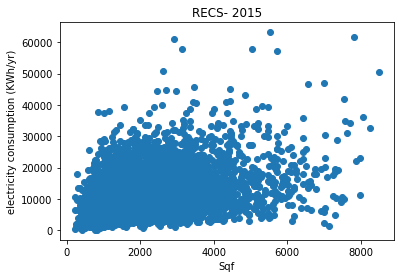

In [170]:
plt.scatter(electricity.TOTSQFT_EN,electricity.KWH )
plt.title("RECS- 2015")
plt.xlabel('Sqf')
plt.ylabel('electricity consumption (KWh/yr)')
plt.show()

# Create a simple regression model of sqft  to electricity consumption

In [146]:
df = pd.DataFrame(electricity) 

### check for missing data

In [148]:
if df.isnull().values.any(): 
    print ("Some missing data are found!")
else: print ("No missing data is found.")

Some missing data are found!


### replace missing data with average values of the data in the same column

In [149]:
df = df.fillna(df.mean())

In [150]:
if df.isnull().values.any(): 
    print ("Some missing data are found!")
else: print ("No missing data is found.")

No missing data is found.


In [151]:
X=df['TOTSQFT_EN']
Y=df['KWH']

In [152]:
print ('independant variable: SQF')
X.describe()

independant variable: SQF


count    5686.000000
mean     2081.443546
std      1282.660286
min       221.000000
25%      1100.500000
50%      1773.500000
75%      2766.000000
max      8501.000000
Name: TOTSQFT_EN, dtype: float64

In [153]:
print ('dependant variable: KWH')
Y.describe()

dependant variable: KWH


count     5686.000000
mean     11028.934872
std       7049.727589
min         59.078000
25%       5926.525750
50%       9549.351000
75%      14557.606750
max      63216.806000
Name: KWH, dtype: float64

## Split data into train (70%) and test set (30%) with seed =42

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

In [155]:
print ('dataset size: ', X.size,'\ntrianing dataset', X_train.size,'\ntest dataset size:',X_test.size)

dataset size:  5686 
trianing dataset 3980 
test dataset size: 1706


## Build the regression model using only sqft as a feature

__Packege: Skit-Learn__

In [156]:
regressor = linear_model.LinearRegression()

In [157]:
model1 = regressor.fit(X_train.values.reshape(-1, 1),y_train.values.reshape(-1, 1))

In [158]:
print ('intercept:',int(model1.intercept_),'\ncoefficinet: ', int(model1.coef_))

intercept: 6793 
coefficinet:  2


__The smallest house in this dataset (221 sqf.) consume 6793 KWh/yr electricty, and each additional sqf results in increase consumption of 2 KWh/yr.__

## Evaluate the quality of fit: RMSE

In [167]:
y_pred = regressor.predict(X_test.values.reshape(-1,1))

In [168]:
print('Root Mean Squared Error:', int(np.sqrt(metrics.mean_squared_error(y_test.values.reshape(-1,1), y_pred))))

Root Mean Squared Error: 6413


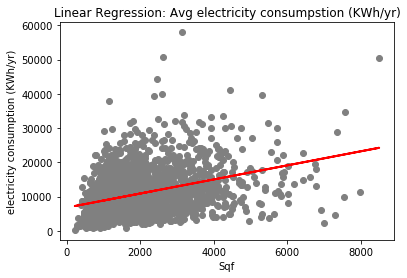

In [161]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.title('Linear Regression: Avg electricity consumpstion (KWh/yr)')
plt.xlabel('Sqf')
plt.ylabel('electricity consumption (KWh/yr)')
plt.show()

Considering the range of average electricity consumption is aobut 63000 (KWh/yr), the RMSE is about 10%. While it is not low, by looking at the scatter plot we can observe the dataset is not concentrate along a linear line.

# Add more features

The next step is adding more feautre and examining if it increases the accuracy of the prediction (lower the RMSE). This step adds the following features:
1. Average Households' Income (catgorical)
2. Location type (categorical)
3. No. of Bedrooms 
4. Climate (CDD)
5. Climate (HDD)


In [162]:
print('Average Households Income data type:', df['MONEYPY'].dtypes)
print('Location-type data type:', df['UATYP10'].dtypes)
print('No. of Bedrooms data type:', df['BEDROOMS'].dtypes)
print('CDD data type:', df['CDD65'].dtypes)
print('HDD data type:', df['HDD65'].dtypes)


Average Households Income data type: int64
Location-type data type: object
No. of Bedrooms data type: int64
CDD data type: int64
HDD data type: int64


In [220]:
df2 = df[['TOTSQFT_EN','MONEYPY','UATYP10','BEDROOMS','CDD65','HDD65']]

In [221]:
df2.describe()

,TOTSQFT_EN,MONEYPY,BEDROOMS,CDD65,HDD65
count,5686.000000,5686.000000,5686.000000,5686.00000,5686.000000
mean,2081.443546,3.669891,2.832923,1719.20612,3707.848751
std,1282.660286,2.228755,1.106412,1193.56296,2149.272713
min,221.000000,1.000000,0.000000,0.00000,0.000000
25%,1100.500000,2.000000,2.000000,793.00000,1881.000000
50%,1773.500000,3.000000,3.000000,1378.00000,3877.500000
75%,2766.000000,5.000000,3.000000,2231.00000,5467.000000
max,8501.000000,8.000000,10.000000,6607.00000,9843.000000


### Dummy Coding for categorical feature: Location-type

Convert location-type categories (Urban Area: U, Urban Cluster: C, Rural: R) to urban:0, urban cluster:1, and rural 2

In [279]:
df2_1 = pd.concat([df2, pd.get_dummies(df2['UATYP10']),pd.get_dummies(df2['MONEYPY'])], axis=1)

In [280]:
df2_1.shape

(5686, 17)

Check the dummy-coding

In [281]:
df2_1.head(10)

,TOTSQFT_EN,MONEYPY,UATYP10,BEDROOMS,CDD65,HDD65,C,R,U,1,2,3,4,5,6,7,8
0,1808,8,U,3,1768,2031,0,0,1,0,0,0,0,0,0,0,1
1,759,2,R,2,2795,1915,0,1,0,0,1,0,0,0,0,0,0
2,2288,2,U,4,2235,2263,0,0,1,0,1,0,0,0,0,0,0
3,2573,3,C,3,1374,3754,1,0,0,0,0,1,0,0,0,0,0
4,1024,3,U,3,993,5401,0,0,1,0,0,1,0,0,0,0,0
5,623,1,C,0,408,7597,1,0,0,1,0,0,0,0,0,0,0
6,832,4,U,2,2582,1579,0,0,1,0,0,0,1,0,0,0,0
7,2682,3,R,3,673,6560,0,1,0,0,0,1,0,0,0,0,0
8,1900,5,U,4,1083,5301,0,0,1,0,0,0,0,1,0,0,0
9,1230,6,U,3,3390,1400,0,0,1,0,0,0,0,0,1,0,0


Remove the categorical feature that was dummy-coded

In [282]:
df2_1 = df2_1.drop(['UATYP10','MONEYPY'], axis=1)

In [283]:
df2_1.shape

(5686, 15)

In [284]:
df2_1.head(10)

,TOTSQFT_EN,BEDROOMS,CDD65,HDD65,C,R,U,1,2,3,4,5,6,7,8
0,1808,3,1768,2031,0,0,1,0,0,0,0,0,0,0,1
1,759,2,2795,1915,0,1,0,0,1,0,0,0,0,0,0
2,2288,4,2235,2263,0,0,1,0,1,0,0,0,0,0,0
3,2573,3,1374,3754,1,0,0,0,0,1,0,0,0,0,0
4,1024,3,993,5401,0,0,1,0,0,1,0,0,0,0,0
5,623,0,408,7597,1,0,0,1,0,0,0,0,0,0,0
6,832,2,2582,1579,0,0,1,0,0,0,1,0,0,0,0
7,2682,3,673,6560,0,1,0,0,0,1,0,0,0,0,0
8,1900,4,1083,5301,0,0,1,0,0,0,0,1,0,0,0
9,1230,3,3390,1400,0,0,1,0,0,0,0,0,1,0,0


Drop one column of each categorical features

In [285]:
X2 = df2_1.drop(['C',1], axis=1)

In [274]:
X2.head(10)

,TOTSQFT_EN,BEDROOMS,CDD65,HDD65,R,U,2,3,4,5,6,7,8
0,1808,3,1768,2031,0,1,0,0,0,0,0,0,1
1,759,2,2795,1915,1,0,1,0,0,0,0,0,0
2,2288,4,2235,2263,0,1,1,0,0,0,0,0,0
3,2573,3,1374,3754,0,0,0,1,0,0,0,0,0
4,1024,3,993,5401,0,1,0,1,0,0,0,0,0
5,623,0,408,7597,0,0,0,0,0,0,0,0,0
6,832,2,2582,1579,0,1,0,0,1,0,0,0,0
7,2682,3,673,6560,1,0,0,1,0,0,0,0,0
8,1900,4,1083,5301,0,1,0,0,0,1,0,0,0
9,1230,3,3390,1400,0,1,0,0,0,0,1,0,0


In [286]:
X2.shape

(5686, 13)

## Split new dataframe into Test (70%) and Train (30%) and develop a new regression model

In [287]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, Y, test_size=0.30, random_state=42)

In [288]:
print ('dataset size: ', X2.shape,'\ntrianing dataset', X2_train.shape,'\ntest dataset size:',X2_test.shape)

dataset size:  (5686, 13) 
trianing dataset (3980, 13) 
test dataset size: (1706, 13)


### Develop a new regression model

In [296]:
regressor_normalize = linear_model.LinearRegression(normalize=True)

In [297]:
model2 = regressor_normalize.fit(X2_train,y2_train)

## Evaluate the quality of the second model: RMSE

In [300]:
y2_pred = regressor.predict(X2_test)

In [301]:
print('Root Mean Squared Error for the second model:', int(np.sqrt(metrics.mean_squared_error(y2_test, y2_pred))))

Root Mean Squared Error for the second model: 5660


__The RMSE drops from 6413 to 5660__

In [302]:
coefficients=pd.DataFrame({'name':list(X2),'value':model2.coef_})
intercept = model2.intercept_

In [307]:
coefficients

,name,value
0,TOTSQFT_EN,1.208580
1,BEDROOMS,1496.008120
2,CDD65,1.650074
3,HDD65,-0.029184
4,R,2523.639515
5,U,-1711.396588
6,2,213.997398
7,3,450.338610
8,4,485.528723
9,5,924.361981


In [306]:
print ('Intercept:', int(intercept))

Intercept: 1714


The second model shows size and number of bedrooms both have positive impact on increasing the electricity cinsumption. The electricity consumption of houses in rural areas is higher than urban areas. Finally, the households with a higher income tend to consume higher electricty, with an exception of income bracket representing avg. yearly income between \\$ 100,000  and \\$120,000 .